# 행렬의 곱

In [1]:
import numpy as np
import scipy.linalg as linalg

A = np.array([[1,2,-1],
              [2,7,4],
              [0,4,-1]])

b = np.array([1,0,1.2])

print("A:",A)
print("b:",b)
# matrix-vector multiplication
y1 = np.matmul(A,b)
y2 = np.dot(A,b)
y3 = A.dot(b)
print(y1,y2,y3)

# matrix-matrix multiplication
B = np.array([[1,2,3,4],
              [-1,2,3,1],
              [3,-2,5,9]])

C1 = np.matmul(A,B)
C2 = np.dot(A,B)
C3 = A.dot(B)


print(C1,C2,C3)


A: [[ 1  2 -1]
 [ 2  7  4]
 [ 0  4 -1]]
b: [1.  0.  1.2]
[-0.2  6.8 -1.2] [-0.2  6.8 -1.2] [-0.2  6.8 -1.2]
[[-4  8  4 -3]
 [ 7 10 47 51]
 [-7 10  7 -5]] [[-4  8  4 -3]
 [ 7 10 47 51]
 [-7 10  7 -5]] [[-4  8  4 -3]
 [ 7 10 47 51]
 [-7 10  7 -5]]


# determinant, solve, inverse

In [14]:
# determinant
det = linalg.det(A)

# solve
x = linalg.solve(A,b)
r = A.dot(x) - b   # check 0 vector

# inverse
Ainv = linalg.inv(A)


In [16]:
det_A=linalg.det(A)
print(det_A)



-27.0


# NORM

In [5]:
# vector norm
x = linalg.solve(A,b)

norm1 = linalg.norm(x,1)          # L1 norm   == sum(np.abs(x))
norm2 = linalg.norm(x)            # L2 norm   == np.sqrt(sum(x*x))
# normp = linalg.norm(x,p)          # p norm
normMax = linalg.norm(x,np.inf)   # max norm  == np.max(abs(x))


print("norm1 :",norm1)
print("norm2 :",norm2)
print("normMax :",normMax)

norm1 : 0.8074074074074075
norm2 : 0.505931890860124
normMax : 0.42962962962962964


# LEAST-SQUARE

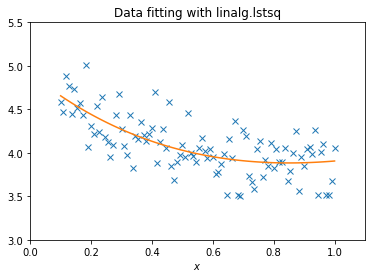

In [23]:
# least-square
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

c1, c2 = 5.0, 2.0
x = np.linspace(0.1,1,100)
y = c1*np.exp(-x) + c2*x
z = y + 0.05 * np.max(y) * np.random.randn(len(y))
A = np.vstack((np.exp(-x),x)).T

c,resid,rank,sigma = linalg.lstsq(A,z)
x2 = np.linspace(0.1,1,100)
y2 = c[0]*np.exp(-x2) + c[1]*x2

plt.plot(x,z,'x',x2,y2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

In [6]:
# eigen
D,V = linalg.eigh(A)   # for real sym or complex hermitian
D,V = linalg.eig(A)   

In [7]:
D


array([ 9.+0.j,  1.+0.j, -3.+0.j])

In [8]:
V

array([[-0.18257419,  0.95257934,  0.40824829],
       [-0.91287093, -0.13608276, -0.40824829],
       [-0.36514837, -0.27216553,  0.81649658]])

# 최적화

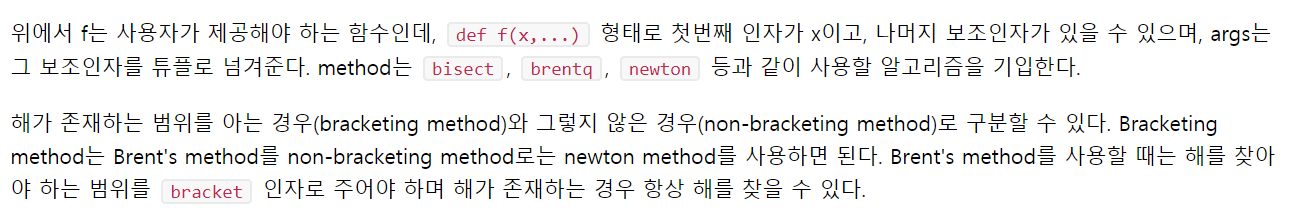

In [9]:
from scipy import optimize

def func(x):
    return x**3-1

sol = optimize.root_scalar(func, bracket=[0, 3], method='brentq')

if sol.converged == True:
    print('Solution = ', sol)  

Solution =        converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 1.0


In [10]:
from scipy import optimize

def func(x):
    return x**3-1

def derivative(x):
    return 3*x**2

sol = optimize.root_scalar(func,x0=1.5,method='newton',fprime=derivative)
if sol.converged == True:
    print('Solution = ', sol)

Solution =        converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: 1.0
